In [10]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font', family='AppleGothic')   # 맥 기본 한글폰트
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

import warnings
warnings.filterwarnings('ignore')

### 1. 데이터 이해 & EDA

In [11]:
train = pd.read_csv('./train.csv')
train.head(3)

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53,1
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45,0
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04,0


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7000 non-null   object 
 1   나이        7000 non-null   int64  
 2   키(cm)     7000 non-null   int64  
 3   몸무게(kg)   7000 non-null   int64  
 4   BMI       7000 non-null   float64
 5   시력        7000 non-null   float64
 6   충치        7000 non-null   int64  
 7   공복 혈당     7000 non-null   int64  
 8   혈압        7000 non-null   int64  
 9   중성 지방     7000 non-null   int64  
 10  혈청 크레아티닌  7000 non-null   float64
 11  콜레스테롤     7000 non-null   int64  
 12  고밀도지단백    7000 non-null   int64  
 13  저밀도지단백    7000 non-null   int64  
 14  헤모글로빈     7000 non-null   float64
 15  요 단백      7000 non-null   int64  
 16  간 효소율     7000 non-null   float64
 17  label     7000 non-null   int64  
dtypes: float64(5), int64(12), object(1)
memory usage: 984.5+ KB


In [13]:
train.describe()

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,43.973571,164.781429,65.932857,24.144423,1.011650,0.227429,99.331857,45.532857,127.144714,0.884900,197.276571,57.355429,115.346857,14.631914,1.083857,1.144696,0.367286
std,12.063793,9.170213,12.978702,3.501945,0.427828,0.419202,21.129670,8.820611,73.918492,0.241523,36.306494,14.506945,41.788153,1.540907,0.392051,0.432735,0.482100
min,20.000000,135.000000,30.000000,14.270000,0.100000,0.000000,57.000000,14.000000,21.000000,0.100000,86.000000,18.000000,1.000000,4.900000,1.000000,0.140000,0.000000
25%,35.000000,160.000000,55.000000,21.600000,0.800000,0.000000,89.000000,40.000000,74.000000,0.800000,173.000000,47.000000,92.000000,13.600000,1.000000,0.840000,0.000000
50%,40.000000,165.000000,65.000000,23.880000,1.000000,0.000000,96.000000,45.000000,107.000000,0.900000,195.000000,55.000000,113.000000,14.800000,1.000000,1.100000,0.000000
75%,50.000000,170.000000,75.000000,26.120000,1.200000,0.000000,104.000000,50.000000,161.000000,1.000000,219.000000,66.000000,136.000000,15.700000,1.000000,1.380000,1.000000
max,85.000000,190.000000,130.000000,42.450000,9.900000,1.000000,386.000000,91.000000,999.000000,10.000000,395.000000,157.000000,1340.000000,20.900000,5.000000,5.670000,1.000000


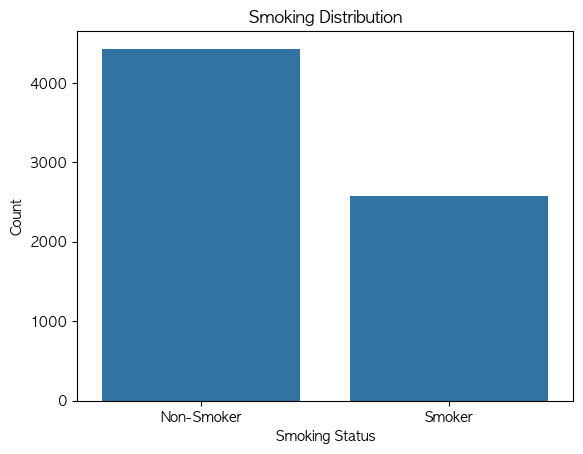

In [14]:
sns.countplot(x='label', data=train)

plt.title('Smoking Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Non-Smoker', 'Smoker'])
plt.show()

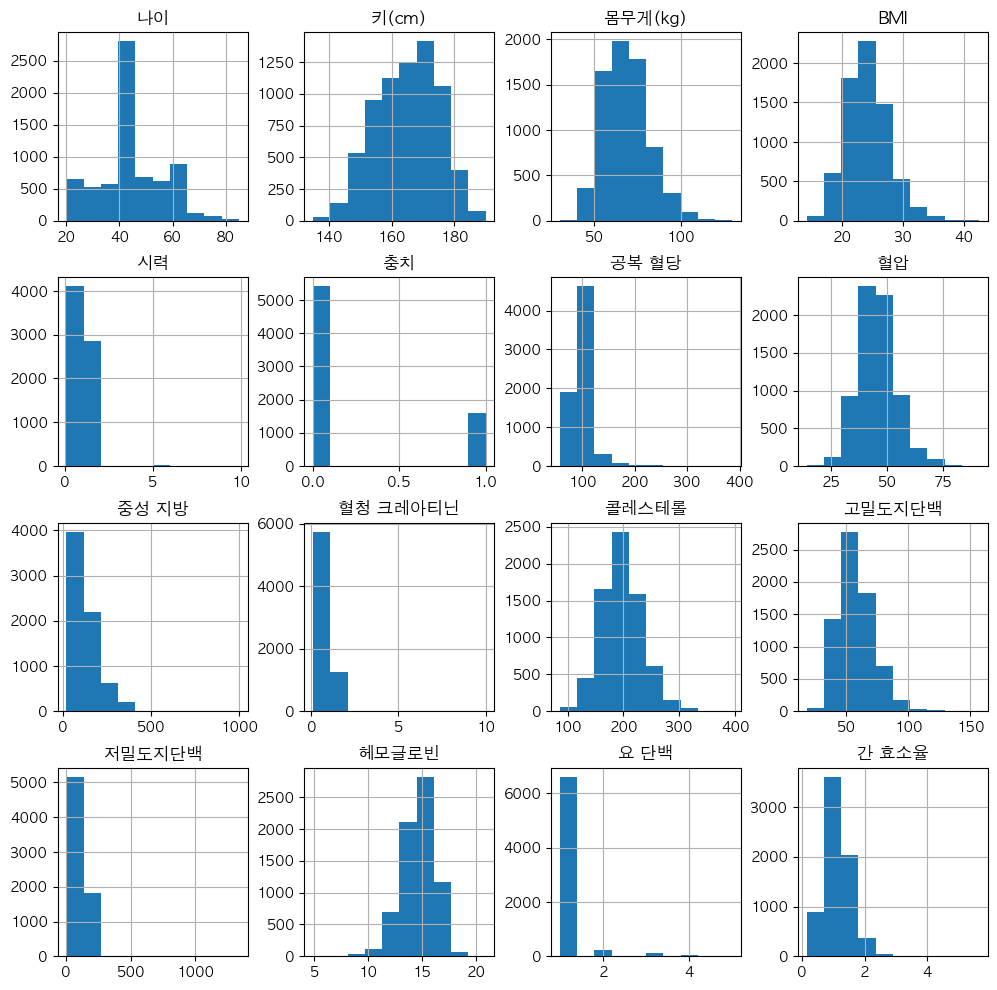

In [15]:
except_target = train.drop('label', axis = 1)
except_target.hist(figsize = (12,12))
plt.show()

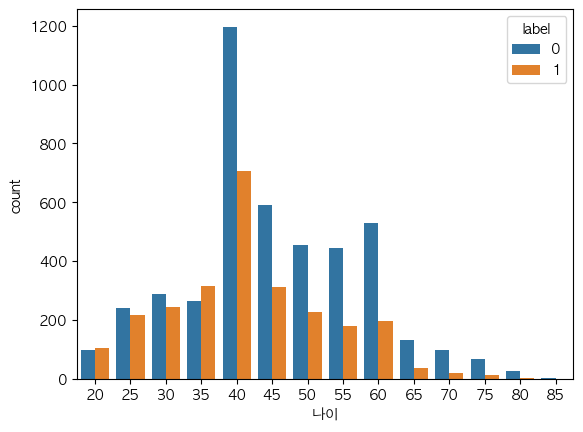

In [16]:
sns.countplot(x = '나이', hue = 'label', data = train)
plt.show()

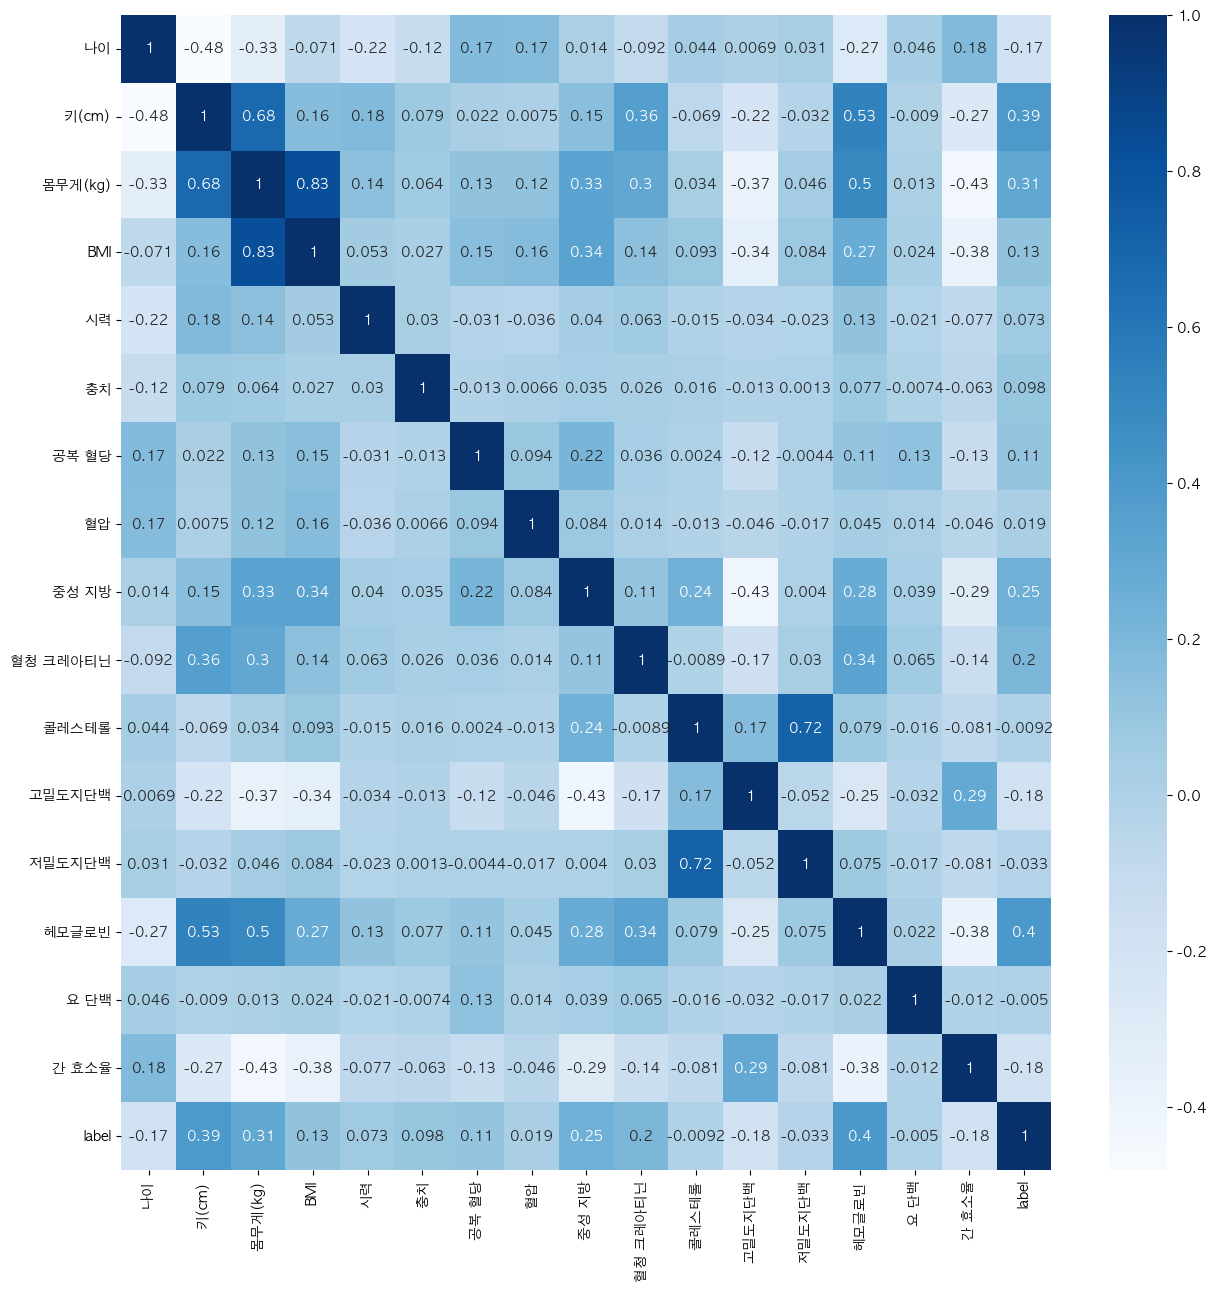

In [17]:
numeric_df = train.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(15,15), dpi=100)
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.show()

### 2. 전처리

In [18]:
# 1) 피처(X) / 타깃(y) 분리 + ID 제거

y = train['label']
X = train.drop(['label', 'ID'], axis=1)

print(X.shape, y.shape)
X.head()

(7000, 16) (7000,)


,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율
0,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53
1,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45
2,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04
3,40,150,45,20.00,0.50,0,92,40,46,0.7,178,66,110,13.4,1,1.18
4,55,155,65,27.06,1.00,0,87,42,95,0.9,232,62,151,13.8,1,1.32


In [19]:
# 2) train / valid 나누기

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(X_train.shape, X_valid.shape)
print(y_train.value_counts(normalize=True))
print(y_valid.value_counts(normalize=True))

(5600, 16) (1400, 16)
label
0    0.632679
1    0.367321
Name: proportion, dtype: float64
label
0    0.632857
1    0.367143
Name: proportion, dtype: float64


In [20]:
# 3) 스케일링

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

X_train_scaled[:3]

array([[ 0.49216621, -0.52328703, -0.84485512, -0.76433216, -0.59944498,
        -0.54129837, -0.96256738, -1.76865806, -0.8109826 ,  0.45464497,
        -0.31473361,  0.59092168, -0.21826545, -0.01704267, -0.21093967,
        -0.41230252],
       [-0.33364076,  0.56588129,  0.69662527,  0.51710731,  0.19832257,
        -0.54129837, -0.1007505 , -0.63138798, -0.09333312,  0.0588098 ,
         2.5785618 , -0.57866072,  2.73890067,  0.56411461, -0.21093967,
         0.21091816],
       [-1.57235122,  0.02129713,  1.85273556,  2.55537009,  0.76815654,
        -0.54129837, -0.1007505 , -0.63138798, -0.13395479,  0.45464497,
         0.23117118, -0.30346486,  0.36260646,  0.82240673, -0.21093967,
        -1.63566164]])

### 3. 모델링(로지스틱 + 랜덤포레스트 + XGBoost)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, classification_report

In [22]:
# 1) 로지스틱 회귀 (스케일링 데이터 사용)

logi = LogisticRegression(max_iter=2000, random_state=42)
logi.fit(X_train_scaled, y_train)

pred_logi = logi.predict(X_valid_scaled)

acc_logi = accuracy_score(y_valid, pred_logi)
f1_logi = f1_score(y_valid, pred_logi)

print("Logistic Regression")
print("accuracy:", acc_logi)
print("f1:", f1_logi)
print(classification_report(y_valid, pred_logi))

Logistic Regression
accuracy: 0.7128571428571429
f1: 0.58298755186722
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       886
           1       0.62      0.55      0.58       514

    accuracy                           0.71      1400
   macro avg       0.69      0.68      0.68      1400
weighted avg       0.71      0.71      0.71      1400



In [23]:
# 2) 랜덤포레스트 (원본 데이터 사용)

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    max_depth=None,
    n_jobs=-1
)
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_valid)

acc_rf = accuracy_score(y_valid, pred_rf)
f1_rf = f1_score(y_valid, pred_rf)

print("RandomForest")
print("accuracy:", acc_rf)
print("f1:", f1_rf)
print(classification_report(y_valid, pred_rf))

RandomForest
accuracy: 0.7492857142857143
f1: 0.663470757430489
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       886
           1       0.65      0.67      0.66       514

    accuracy                           0.75      1400
   macro avg       0.73      0.73      0.73      1400
weighted avg       0.75      0.75      0.75      1400



In [24]:
# 3) XGBoost (원본 데이터 사용)

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)
xgb.fit(X_train, y_train)

pred_xgb = xgb.predict(X_valid)

acc_xgb = accuracy_score(y_valid, pred_xgb)
f1_xgb = f1_score(y_valid, pred_xgb)

print("XGBoost")
print("accuracy:", acc_xgb)
print("f1:", f1_xgb)
print(classification_report(y_valid, pred_xgb))

XGBoost
accuracy: 0.7385714285714285
f1: 0.6514285714285715
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       886
           1       0.64      0.67      0.65       514

    accuracy                           0.74      1400
   macro avg       0.72      0.72      0.72      1400
weighted avg       0.74      0.74      0.74      1400



### 4. 성능 비교

In [25]:
result = pd.DataFrame({
    "model": ["Logistic", "RandomForest", "XGBoost"],
    "accuracy": [acc_logi, acc_rf, acc_xgb],
    "f1": [f1_logi, f1_rf, f1_xgb]
})
result

,model,accuracy,f1
0,Logistic,0.712857,0.582988
1,RandomForest,0.749286,0.663471
2,XGBoost,0.738571,0.651429


### 5. test 예측

In [30]:
test = pd.read_csv('./test.csv')
test.head()

X_test = test.drop('ID', axis=1)

from sklearn.ensemble import RandomForestClassifier

final_rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
final_rf.fit(X, y)

test_pred = final_rf.predict(X_test)

### 6. 제출파일 생성

In [31]:
submission = pd.read_csv('./sample_submission.csv')
submission['label'] = test_pred

submission.to_csv('submission.csv', index=False)

submission.head()

,ID,label
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,1
3,TEST_0003,1
4,TEST_0004,0
